In [131]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
dataset = pd.read_csv('Obesity_Data_Set.csv')

In [135]:
dataset.shape

(2111, 17)

In [137]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


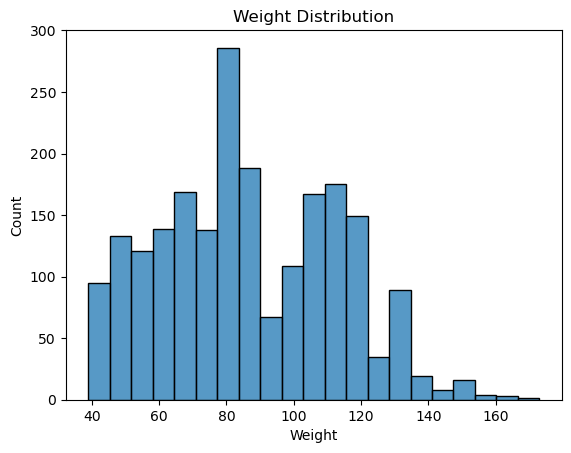

In [139]:
sns.histplot(dataset.Weight)
plt.title('Weight Distribution')
plt.show()

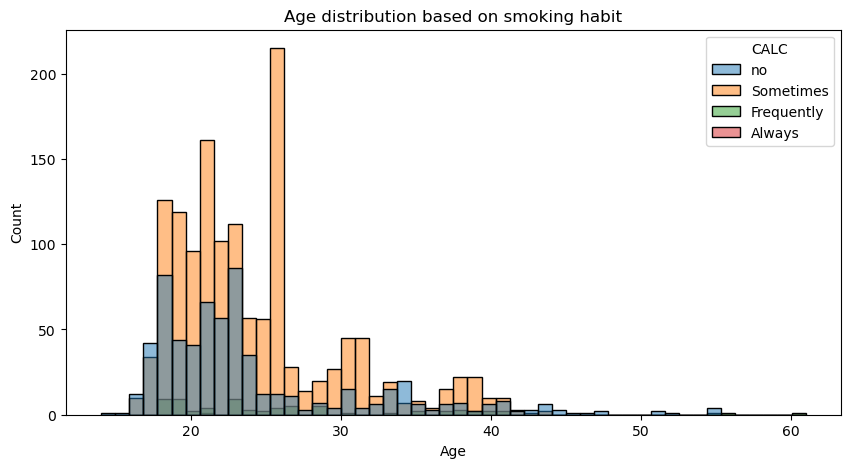

In [141]:
plt.figure(figsize = (10 , 5))
plt.title('Age distribution based on smoking habit')
sns.histplot(x = 'Age' , hue = 'CALC' , data = dataset)
plt.show()

In [143]:
dataset.iloc[:,0].unique()

array(['Female', 'Male'], dtype=object)

In [145]:
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [147]:
dataset.iloc[:,14].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [149]:
dataset.iloc[:,16].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [151]:
from sklearn import preprocessing 

In [153]:
enc = preprocessing.OrdinalEncoder()

In [155]:
dataset['family_history_with_overweight'] = enc.fit_transform(dataset['family_history_with_overweight'].values.reshape(-1,1))

In [157]:
enc.categories_

[array(['no', 'yes'], dtype=object)]

In [159]:
dataset['Gender'] = enc.fit_transform(dataset['Gender'].values.reshape(-1,1))
dataset['FAVC'] = enc.fit_transform(dataset['FAVC'].values.reshape(-1,1))
dataset['CAEC'] = enc.fit_transform(dataset['CAEC'].values.reshape(-1,1))
dataset['SCC'] = enc.fit_transform(dataset['SCC'].values.reshape(-1,1))
dataset['CALC'] = enc.fit_transform(dataset['CALC'].values.reshape(-1,1))
dataset['MTRANS'] = enc.fit_transform(dataset['MTRANS'].values.reshape(-1,1))
dataset['NObeyesdad'] = enc.fit_transform(dataset['NObeyesdad'].values.reshape(-1,1))
dataset['SMOKE'] = enc.fit_transform(dataset['SMOKE'].values.reshape(-1,1))

In [161]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,1.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,5.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,6.0


In [163]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
Y = dataset.iloc[:,16].values

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size = 0.3, random_state = 0)

In [167]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_s,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [169]:
y_pred = classifier.predict(X_test_s)
print(y_pred)

[3. 2. 5. 4. 4. 3. 0. 4. 2. 3. 4. 2. 5. 2. 1. 2. 1. 4. 6. 6. 4. 2. 3. 6.
 2. 3. 4. 6. 5. 3. 5. 6. 6. 2. 3. 5. 6. 0. 5. 0. 1. 6. 0. 5. 4. 3. 2. 0.
 4. 0. 5. 3. 3. 5. 2. 2. 5. 5. 3. 1. 2. 1. 2. 0. 0. 3. 1. 5. 5. 2. 5. 4.
 2. 2. 2. 1. 2. 5. 3. 0. 6. 5. 2. 5. 6. 1. 1. 2. 4. 3. 5. 0. 0. 3. 6. 4.
 2. 3. 3. 3. 0. 2. 0. 5. 4. 2. 6. 4. 5. 6. 0. 5. 2. 1. 2. 6. 2. 2. 6. 0.
 2. 4. 0. 0. 4. 6. 2. 5. 6. 5. 1. 0. 1. 2. 6. 4. 5. 3. 4. 3. 6. 6. 1. 1.
 0. 1. 2. 6. 2. 0. 6. 5. 4. 4. 4. 2. 2. 1. 3. 5. 2. 4. 2. 4. 0. 0. 3. 2.
 5. 4. 5. 3. 4. 1. 5. 3. 2. 0. 1. 3. 5. 2. 4. 4. 4. 0. 5. 5. 3. 4. 2. 6.
 3. 6. 1. 4. 3. 3. 2. 5. 1. 1. 5. 5. 2. 5. 2. 2. 2. 0. 5. 5. 1. 3. 3. 6.
 1. 4. 6. 4. 3. 2. 1. 0. 4. 4. 1. 6. 5. 0. 4. 4. 5. 4. 0. 3. 1. 1. 2. 4.
 2. 0. 4. 4. 1. 1. 0. 4. 6. 6. 2. 5. 6. 4. 1. 4. 1. 4. 2. 1. 4. 0. 1. 1.
 0. 2. 3. 0. 5. 4. 6. 2. 4. 1. 6. 2. 1. 1. 1. 6. 2. 1. 0. 1. 6. 1. 2. 4.
 6. 4. 4. 3. 1. 4. 4. 5. 0. 1. 4. 4. 0. 1. 5. 0. 6. 4. 5. 0. 0. 0. 5. 0.
 2. 0. 3. 3. 4. 0. 1. 0. 3. 2. 4. 6. 4. 6. 2. 0. 0.

In [171]:
print(Y_test)

[3. 2. 5. 4. 4. 3. 0. 4. 2. 3. 4. 2. 5. 2. 1. 2. 1. 4. 6. 6. 4. 2. 2. 6.
 2. 3. 4. 6. 5. 3. 5. 6. 6. 2. 3. 5. 6. 0. 5. 0. 5. 6. 0. 5. 4. 3. 2. 0.
 4. 0. 5. 3. 3. 5. 2. 2. 5. 5. 3. 1. 2. 1. 2. 0. 0. 3. 1. 5. 5. 2. 6. 4.
 3. 2. 2. 1. 2. 5. 3. 0. 6. 5. 2. 5. 6. 1. 1. 3. 4. 3. 5. 0. 0. 3. 6. 4.
 2. 3. 3. 3. 0. 2. 0. 5. 4. 2. 6. 4. 5. 6. 0. 5. 2. 1. 2. 6. 2. 2. 6. 0.
 2. 4. 0. 1. 4. 6. 2. 5. 6. 5. 1. 0. 1. 2. 6. 4. 5. 3. 4. 3. 6. 6. 1. 0.
 0. 1. 6. 6. 2. 0. 6. 5. 4. 4. 4. 2. 2. 1. 3. 5. 2. 4. 6. 4. 0. 0. 3. 2.
 5. 4. 5. 3. 4. 1. 5. 3. 2. 0. 1. 3. 5. 2. 4. 4. 4. 0. 5. 5. 3. 4. 2. 6.
 3. 6. 1. 4. 3. 3. 2. 5. 1. 0. 5. 5. 2. 6. 2. 2. 2. 0. 5. 1. 1. 3. 3. 6.
 5. 4. 6. 4. 3. 2. 1. 0. 4. 4. 1. 6. 5. 0. 4. 4. 5. 4. 0. 3. 1. 5. 2. 4.
 2. 0. 4. 4. 1. 1. 0. 4. 6. 6. 2. 5. 6. 4. 1. 4. 0. 4. 2. 1. 4. 1. 1. 1.
 0. 2. 3. 0. 1. 4. 6. 2. 4. 1. 6. 2. 1. 1. 1. 6. 2. 1. 0. 1. 6. 5. 2. 4.
 6. 4. 4. 3. 1. 4. 4. 5. 1. 1. 4. 4. 0. 1. 1. 0. 6. 4. 5. 0. 0. 0. 5. 0.
 2. 0. 3. 3. 4. 0. 1. 0. 3. 2. 4. 6. 4. 6. 2. 0. 0.

In [173]:
from sklearn import metrics

In [175]:
acc = metrics.accuracy_score(Y_test,y_pred)

In [177]:
acc

0.9511041009463722

In [179]:
cm = metrics.confusion_matrix(Y_test,y_pred)

In [181]:
cm

array([[ 85,   5,   0,   0,   0,   0,   0],
       [  6,  78,   0,   0,   0,   3,   0],
       [  0,   0, 101,   2,   0,   0,   0],
       [  0,   0,   2,  88,   0,   0,   0],
       [  0,   0,   0,   0, 101,   0,   0],
       [  0,   5,   0,   0,   0,  75,   1],
       [  0,   0,   4,   0,   0,   3,  75]], dtype=int64)

In [183]:
result = metrics.classification_report(Y_test,y_pred)

In [185]:
print (result)

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94        90
         1.0       0.89      0.90      0.89        87
         2.0       0.94      0.98      0.96       103
         3.0       0.98      0.98      0.98        90
         4.0       1.00      1.00      1.00       101
         5.0       0.93      0.93      0.93        81
         6.0       0.99      0.91      0.95        82

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



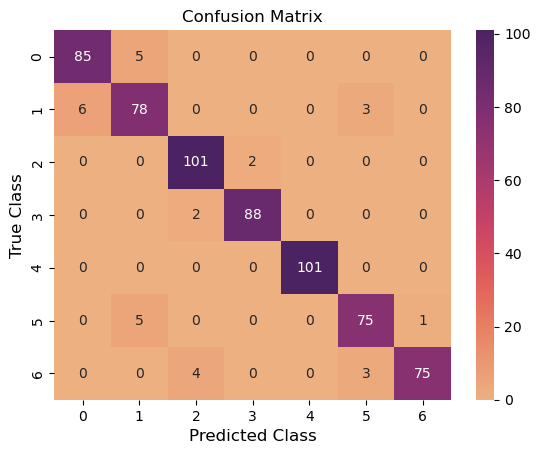

In [119]:
ans = sns.heatmap(cm , cmap = 'flare', annot = True , fmt = 'd')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class' , fontsize = 12)
plt.title('Confusion Matrix' , fontsize = 12)

plt.show()